In [2]:
import os
import string
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [3]:
# Download the dataset and specify the categories to download
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [4]:
# Load the NLTK stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [5]:
# Define a function to preprocess the text data
def preprocess(text):
    # Remove punctuation marks and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove stop words and stem the remaining words
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [6]:
# Preprocess the text data in the training and testing datasets
preprocessed_train_data = []
for text in newsgroups_train.data:
    preprocessed_text = preprocess(text)
    preprocessed_train_data.append(preprocessed_text)

In [7]:
preprocessed_test_data = []
for text in newsgroups_test.data:
    preprocessed_text = preprocess(text)
    preprocessed_test_data.append(preprocessed_text)

In [8]:
# Convert the preprocessed text data into feature vectors
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(preprocessed_train_data)
test_features = vectorizer.transform(preprocessed_test_data)

In [9]:
nb = MultinomialNB()
rf = RandomForestClassifier()

In [10]:
nb.fit(train_features, newsgroups_train.target)
rf.fit(train_features, newsgroups_train.target)

RandomForestClassifier()

In [11]:
# make predictions on the testing set
nb_pred = nb.predict(test_features)
rf_pred = rf.predict(test_features)

In [12]:
# calculate performance metrics for each classifier
nb_acc = accuracy_score(newsgroups_test.target, nb_pred)
nb_prec = precision_score(newsgroups_test.target, nb_pred, average='macro')
nb_rec = recall_score(newsgroups_test.target, nb_pred, average='weighted')
nb_f1 = f1_score(newsgroups_test.target, nb_pred, average='weighted')


In [13]:
rf_acc = accuracy_score(newsgroups_test.target, rf_pred)
rf_prec = precision_score(newsgroups_test.target, rf_pred, average='weighted')
rf_rec = recall_score(newsgroups_test.target, rf_pred, average='weighted')
rf_f1 = f1_score(newsgroups_test.target, rf_pred, average='weighted')

In [14]:
# print the performance metrics
print('Naive Bayes: Accuracy =', nb_acc, 'Precision =', nb_prec, 'Recall =', nb_rec, 'F1 score =', nb_f1)
print('Random Forest: Accuracy =', rf_acc, 'Precision =', rf_prec, 'Recall =', rf_rec, 'F1 score =', rf_f1)

Naive Bayes: Accuracy = 0.811603823685608 Precision = 0.8457165061090484 Recall = 0.811603823685608 F1 score = 0.8037271591373294
Random Forest: Accuracy = 0.7677907594264471 Precision = 0.7814824931073574 Recall = 0.7677907594264471 F1 score = 0.7631456421368334


In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
nn.fit(train_features, newsgroups_train.target)

y_pred_nn = nn.predict(test_features)

accuracy_nn = accuracy_score(newsgroups_test.target, y_pred_nn)
precision_nn = precision_score(newsgroups_test.target, y_pred_nn, average='macro')
recall_nn = recall_score(newsgroups_test.target, y_pred_nn, average='macro')
f1_score_nn = f1_score(newsgroups_test.target, y_pred_nn, average='macro')

In [ ]:
print('Neural Network: Accuracy =', accuracy_nn, 'Neural Network:Precision =', precision_nn, 'Neural Network:Recall =', recall_nn, 'Neural Network:F1 score =',f1_score_nn )

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
cglf = GaussianNB()
cglf.fit(train_features.toarray(), newsgroups_train.target)

GaussianNB()

In [16]:
# Predict the labels of the testing data using the trained classifier
predicted_labels = cglf.predict(test_features.toarray())

In [17]:
accuracy = accuracy_score(newsgroups_test.target, predicted_labels)
prec = precision_score(newsgroups_test.target, predicted_labels, average='weighted')
rec = recall_score(newsgroups_test.target, predicted_labels, average='weighted')
f1 = f1_score(newsgroups_test.target, predicted_labels, average='weighted')
print('Gaussian Naive Bayes: Accuracy=', accuracy)
print('Gaussian Naive Bayes: Precision=', prec)
print('Gaussian Naive Bayes: Recall=', rec)
print('Gaussian Naive Bayes: F1=', f1)

Accuracy: 0.7320764737121614
Precision: 0.7306466795904548
Recall: 0.7320764737121614
F1: 0.7291075099297726


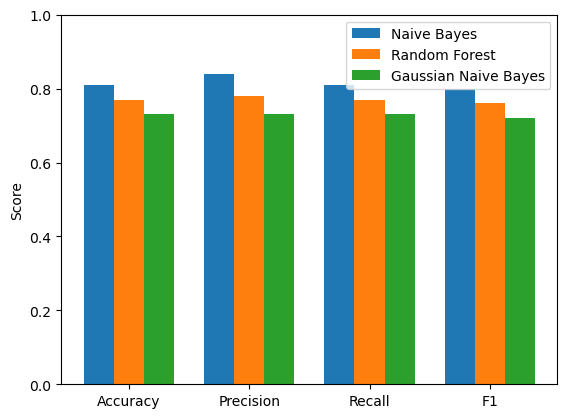

In [24]:
import matplotlib.pyplot as plt

# Define the performance measures for Naive Bayes, Random Forest, and Gaussian Naive Bayes
nb_acc, nb_prec, nb_rec, nb_f1 = 0.81, 0.84, 0.81, 0.80
rf_acc, rf_prec, rf_rec, rf_f1 = 0.77, 0.78, 0.77, 0.76
gnb_acc, gnb_prec, gnb_rec, gnb_f1 = 0.73, 0.73, 0.73, 0.72

# Define the labels and values for the different measures
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
nb_values = [nb_acc, nb_prec, nb_rec, nb_f1]
rf_values = [rf_acc, rf_prec, rf_rec, rf_f1]
gnb_values = [gnb_acc, gnb_prec, gnb_rec, gnb_f1]

# Create a bar plot to compare the measures for Naive Bayes, Random Forest, and Gaussian Naive Bayes
x = list(range(len(labels)))
width = 0.25
fig, ax = plt.subplots()
ax.bar([i - width for i in x], nb_values, width, label='Naive Bayes')
ax.bar(x, rf_values, width, label='Random Forest')
ax.bar([i + width for i in x], gnb_values, width, label='Gaussian Naive Bayes')
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.set_ylim([0, 1])

# Show the plot
plt.show()
